In [1]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

In [2]:
### Read in output of 02*ipynb
cluster_this = pickle.load(open('cluster_this_100.pkl', 'rb'))

In [3]:
cluster_this.shape
## (134780, 100)

(134780, 100)

In [4]:
### Load original data with columns 'ID', 'Category', 'Success', etc.
kicks = pickle.load(open("kicks_modeling_data.pkl",'rb'))

In [5]:
### Create df from IDs to append to vectorized data for clustering
ids = pd.DataFrame(kicks['id'])

In [6]:
### Create a version of data for clustering in dataframe format
cluster_this_=pd.DataFrame(cluster_this)

In [7]:
### Append IDs to the countvector data
cluster_now = pd.concat([ids,cluster_this_],axis=1)

In [8]:
### Shuffle the resluting dataframe before sampling down 
from sklearn.utils import shuffle
cluster_now = shuffle(cluster_now)

In [9]:
### Sample 20K (kernel died at 130k, 60k,...)
cluster_df_20K = cluster_now.sample(n=20000,random_state=10).reset_index()

In [10]:
### Create an array for NLP clustering
cluster_this_20K = np.array(cluster_df_20K.drop(['id','index'],axis=1))

For n_clusters = 2 The average silhouette_score is : 0.0225854074202
For n_clusters = 3 The average silhouette_score is : 0.0302043547398
For n_clusters = 4 The average silhouette_score is : 0.0359338279265
For n_clusters = 5 The average silhouette_score is : 0.0413819032687
For n_clusters = 6 The average silhouette_score is : 0.0450673413087
For n_clusters = 9 The average silhouette_score is : 0.0572445873422
For n_clusters = 10 The average silhouette_score is : 0.063749683268
For n_clusters = 15 The average silhouette_score is : 0.0775758222982


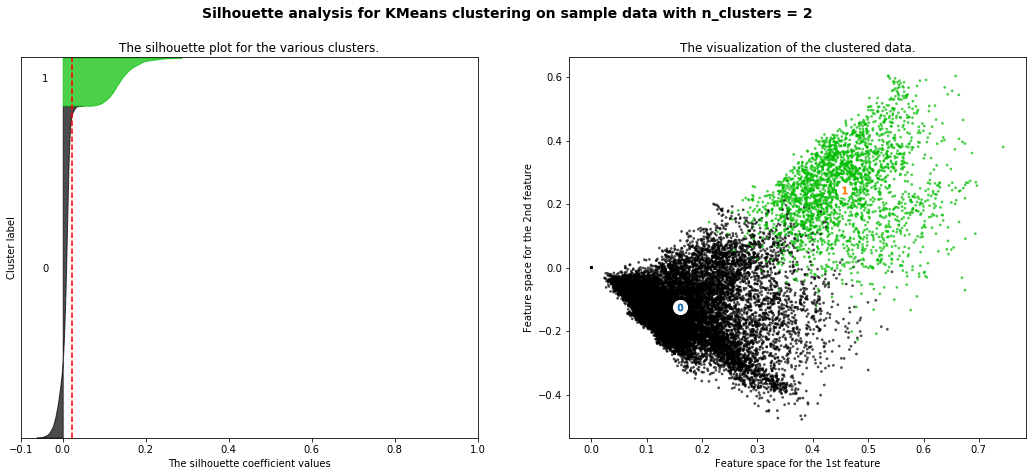

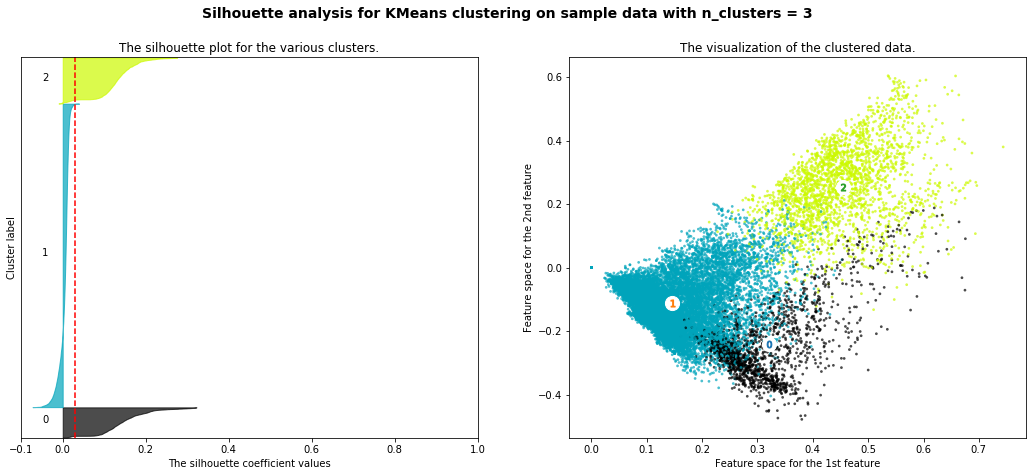

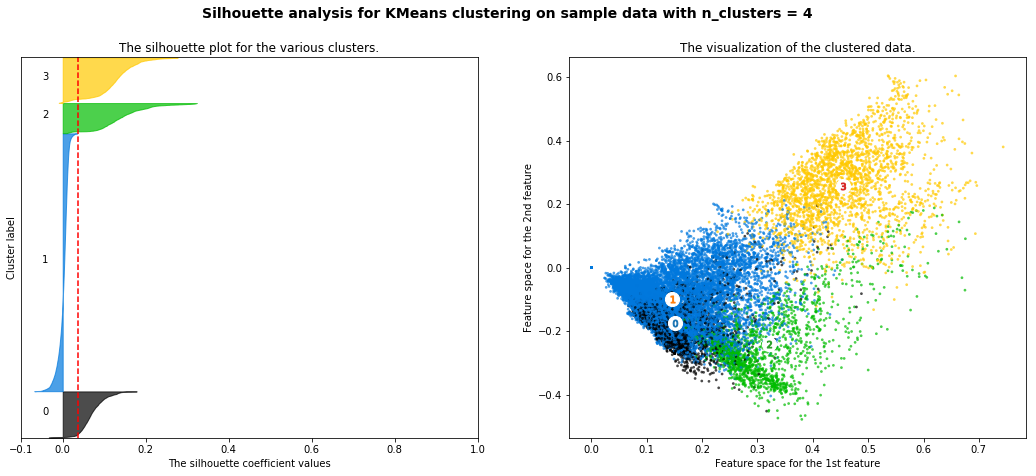

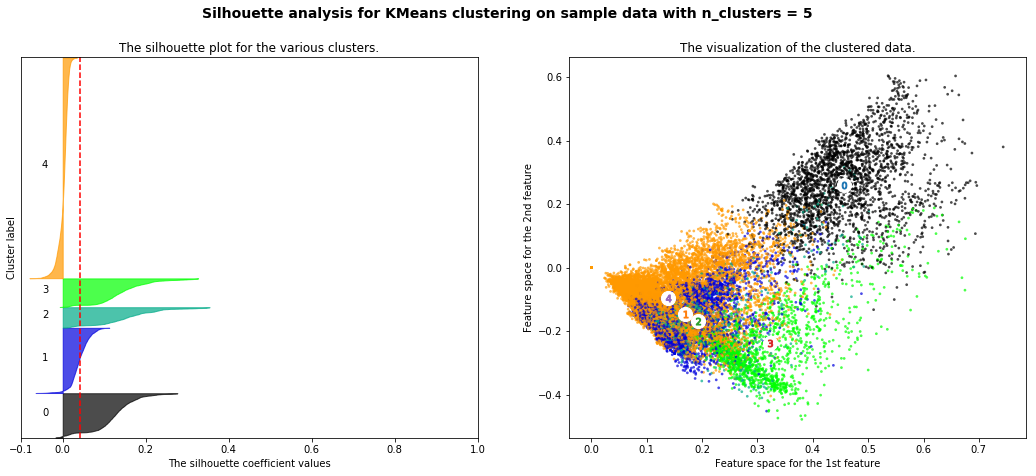

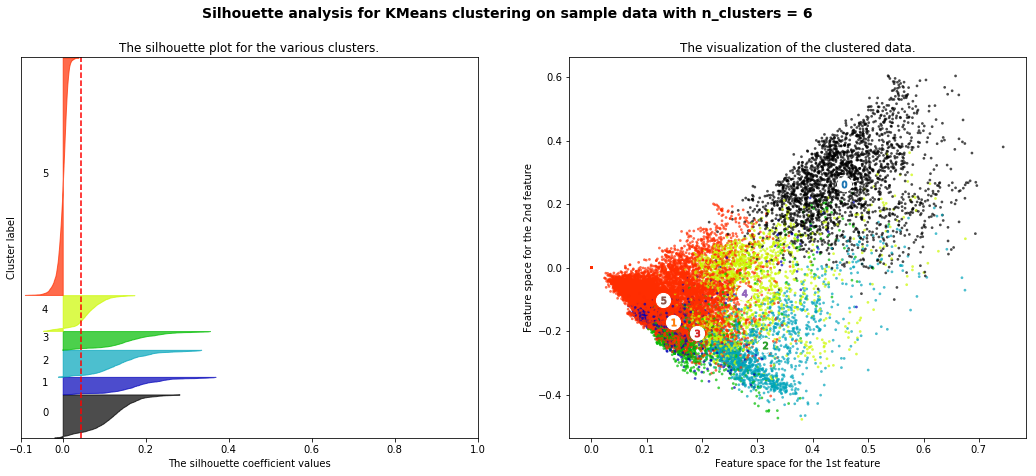

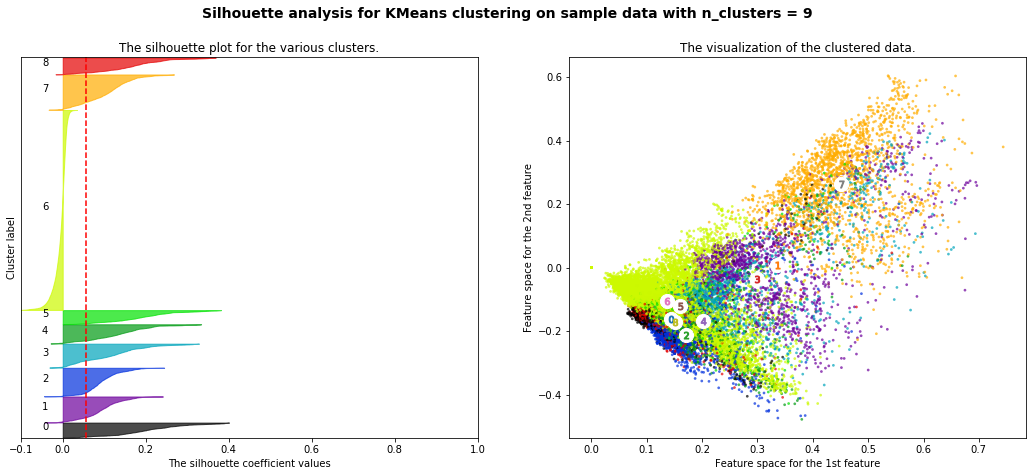

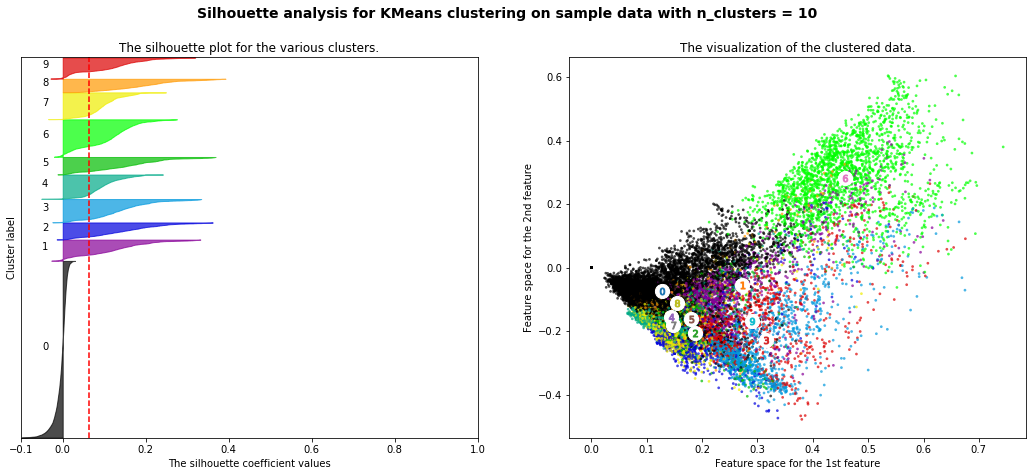

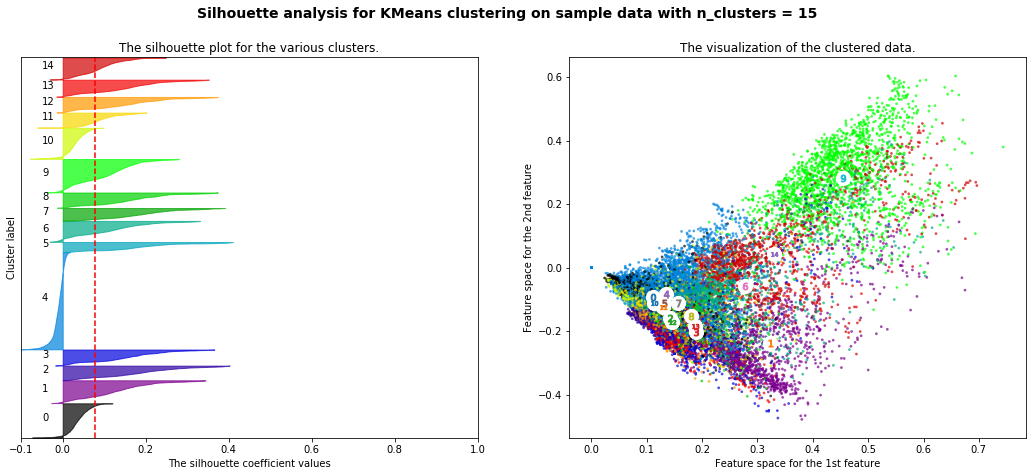

In [11]:
range_n_clusters = [2, 3, 4, 5, 6, 9, 10, 15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cluster_this_20K) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cluster_this_20K)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cluster_this_20K, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cluster_this_20K, cluster_labels)
    
    
    y_lower = 10

    for i in range(n_clusters):
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(cluster_this_20K[:, 0], cluster_this_20K[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold') 

For n_clusters = 15 The average silhouette_score is : 0.0775758222982


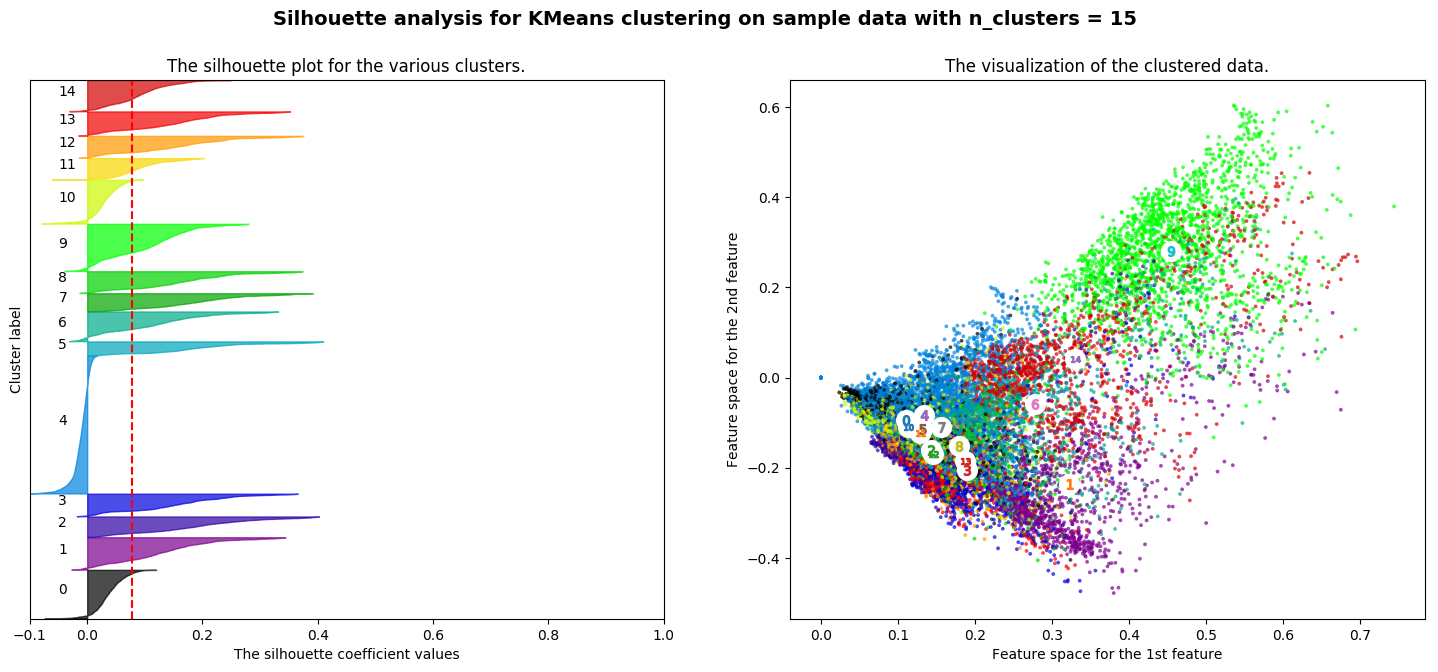

In [176]:
### I decided on 15 clusters for three reasons: 
### 1) there are 15 categories to which Kickstarter assigns each project
### 2) I believe that more than 12 clusters are hard to manage and talk about (but because of categories
### number I went with 15
### 3) Among reasonable cluster number options, 15 has the highest silhouette score

range_n_clusters = [15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cluster_this_20K) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cluster_this_20K)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cluster_this_20K, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cluster_this_20K, cluster_labels)
    
    
    y_lower = 10

    for i in range(n_clusters):
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(cluster_this_20K[:, 0], cluster_this_20K[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('clusters15_viz.png', bbox_inches='tight')

In [13]:
### Next section is devoted to extracting words 

### The approach is to find each of the 100 dimension coefficients for each cluster, then multiply 
### it by LSA components matrix to get cluster to words map and use each word/token weight in each
### of 100 dimensions to select most contributing words/tokens for each cluster

In [14]:
### Save centers of each cluster (think miu in inertia formula)
### that is 15 vectors of 100 elements (for each dimension)
centroids = clusterer.cluster_centers_

In [15]:
### Bring back/read in vectorized dataframe(s) from job 02*ipynb and concatenate everything in one DataFrame

tknzFiltered_p1 = pickle.load(open("kicks_data_vectorized_p1.pkl",'rb'))
tknzFiltered_p2 = pickle.load(open("kicks_data_vectorized_p2.pkl",'rb'))
tknzFiltered_p3 = pickle.load(open("kicks_data_vectorized_p3.pkl",'rb'))

tknzFiltered=pd.concat([tknzFiltered_p1,tknzFiltered_p2,tknzFiltered_p3],axis=1)



In [16]:
### Fit LSA algorithm to reduce feature space to 100 dimensions

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

TargetDimensions=100
lsa=TruncatedSVD(n_components=TargetDimensions, algorithm='randomized')
tknzFiltered_100=lsa.fit_transform(tknzFiltered)
tknzFiltered_100=Normalizer(copy=False).fit_transform(tknzFiltered_100)

In [17]:
print(centroids.shape)
print(lsa.components_.shape)


(15, 100)
(100, 3740)


In [18]:
### Perform matrix multiplication to map clusters and tokens
from scipy import linalg
get_feat = centroids.dot(lsa.components_)
print(get_feat.shape)

(15, 3740)


In [19]:
### Turn elements of get_feat matrix to their absolute values
### It is the magnitude of the coefficinet that matters, not the sign
### This also simplifies exrtaction of "signature" words down the road 

get_feat2 = np.absolute(get_feat)

In [22]:
### Loop through each row (i.e. cluster), sort tokens by weight, 
### print top n tokens with the highest weights as well as weights themselves

### Setting n to 10 - arbitrarily convenient number
no_top_words = 10
for topic_idx, topic in enumerate(get_feat2):
    print ("Topic %d:" % (topic_idx))
    words = ",".join([tknzFiltered.columns[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    print (" ".join([tknzFiltered.columns[i]
        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    wght = np.array([topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    myF = [ '%.4f' % elem for elem in wght]    
    print(myF)

Topic 0:
made food build uniqu app hand fun high share set
['0.1237', '0.1138', '0.0737', '0.0671', '0.0647', '0.0627', '0.0609', '0.0580', '0.0558', '0.0548']
Topic 1:
new music album help record york creat song work releas
['0.5598', '0.0677', '0.0497', '0.0402', '0.0385', '0.0372', '0.0324', '0.0315', '0.0286', '0.0254']
Topic 2:
game card play video player fun world adventur board build
['0.6019', '0.0854', '0.0655', '0.0602', '0.0573', '0.0461', '0.0393', '0.0385', '0.0361', '0.0359']
Topic 3:
art creat project book artist work paint show music commun
['0.5757', '0.0616', '0.0518', '0.0459', '0.0451', '0.0391', '0.0330', '0.0328', '0.0315', '0.0315']
Topic 4:
creat music one take get project need want first love
['0.0572', '0.0546', '0.0450', '0.0421', '0.0406', '0.0391', '0.0365', '0.0365', '0.0356', '0.0344']
Topic 5:
design creat custom inspir fashion uniqu shirt build made new
['0.6146', '0.0523', '0.0429', '0.0345', '0.0338', '0.0335', '0.0328', '0.0301', '0.0298', '0.0297']


In [59]:
### Save top 5 words with their weights for each of 15 topic as a list of lists for further analysis

no_top_words = 5

TopicsList=[["Topic %d:" % (topic_idx), 
             [tknzFiltered.columns[i] for i in topic.argsort()[:-no_top_words - 1:-1]], 
            [ float('%.4f' % elem ) for elem in np.array([topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]])]] for topic_idx, topic in enumerate(get_feat2)]



In [116]:
### Save cluster labels/IDs for all 20K projects as a dataframe
labels = pd.DataFrame(cluster_labels)
labels.shape

(20000, 1)

In [62]:
### Append project IDs from dataframe 20K sample to cluster IDs using row index
labeled_20K = pd.concat([labels,cluster_df_20K],axis=1).ix[:,0:3]

In [66]:
### Merge 20K cluster IDs and original 130K data frame on project ID to append project characteristics
### such as goal, pledged amt, etc. for further analysis of clusters
fin = labeled_20K.merge(kicks, on = 'id', how="inner")

In [68]:
fin.shape

(20000, 24)

In [97]:
### Review number of projects in each cluster
fin.groupby(0).size()

0
0     1819
1     1209
2      767
3      842
4     5146
5      530
6     1109
7      673
8      812
9     1763
10    1643
11     796
12     821
13     904
14    1166
dtype: int64

In [70]:
### Review number of projects on each state
fin.groupby('state').size()

state
canceled      1305
failed        9289
live           336
successful    9003
suspended       67
dtype: int64

In [57]:
### Recode project's status variable into a set of dummies
fin2 = pd.get_dummies(fin, prefix='d', prefix_sep='_', dummy_na=False, columns=['state'], sparse=False)

In [58]:
### Add a set of dummies for category variable
fin3 = pd.get_dummies(fin2, prefix='d', prefix_sep='_', dummy_na=False, columns=['category'], sparse=False)

In [72]:
### Summarize all numeric characteristics by cluster
summary=fin3.groupby(0).mean()

### Drop columns of no meaning or duplicates, i.e.
### index, id, usd_pledged (same as pledged for the US subset) and creator_registered
sum2 = summary.drop(summary.columns[[0,1,6,7]], axis=1).reset_index()
sum2.shape


(15, 25)

In [181]:
sum2

,0,backers_count,goal,pledged,staff_pick,d_canceled,d_failed,d_live,d_successful,d_suspended,...,d_fashion,d_film & video,d_food,d_games,d_journalism,d_music,d_photography,d_publishing,d_technology,d_theater
0,0,188.443650,54326.879604,19503.406833,0.107202,0.085761,0.569544,0.025838,0.316108,0.002749,...,0.113249,0.043430,0.245190,0.034085,0.013744,0.012095,0.004948,0.046729,0.301814,0.004948
1,1,106.445823,16480.919884,8238.173102,0.141439,0.054591,0.400331,0.012407,0.531844,0.000827,...,0.054591,0.141439,0.053763,0.042184,0.014061,0.365591,0.007444,0.062862,0.079404,0.027295
2,2,492.574967,173578.791395,52463.422190,0.199478,0.083442,0.406780,0.020860,0.485007,0.003911,...,0.003911,0.058670,0.010430,0.765319,0.006519,0.011734,0.003911,0.022164,0.067797,0.001304
3,3,60.701900,20114.701354,5735.567363,0.127078,0.066508,0.495249,0.011876,0.426366,0.000000,...,0.030879,0.043943,0.020190,0.020190,0.005938,0.034442,0.043943,0.131829,0.007126,0.024941
4,4,105.965021,23344.795564,10313.509914,0.112126,0.078508,0.509328,0.017684,0.389234,0.005247,...,0.057520,0.138166,0.076176,0.048581,0.017295,0.175670,0.028372,0.093276,0.105908,0.025845
5,5,159.528302,35663.332075,16993.142868,0.137736,0.086792,0.469811,0.030189,0.409434,0.003774,...,0.228302,0.020755,0.022642,0.073585,0.003774,0.003774,0.007547,0.041509,0.220755,0.009434
6,6,148.181244,90867.131650,13072.839423,0.103697,0.066727,0.495942,0.014427,0.416592,0.006312,...,0.067628,0.144274,0.114518,0.024346,0.009919,0.230839,0.011722,0.062218,0.120830,0.006312
7,7,83.600297,75634.190193,7868.758544,0.173848,0.047548,0.340267,0.016345,0.595840,0.000000,...,0.000000,0.897474,0.001486,0.002972,0.001486,0.035661,0.004458,0.010401,0.007429,0.010401
8,8,275.413793,102197.476589,21807.182291,0.149015,0.066502,0.465517,0.012315,0.450739,0.004926,...,0.029557,0.206897,0.041872,0.099754,0.011084,0.118227,0.020936,0.130542,0.121921,0.012315
9,9,88.325014,53378.468406,7208.454623,0.110040,0.061259,0.434487,0.006807,0.494044,0.003403,...,0.034600,0.099263,0.100397,0.020420,0.014180,0.357913,0.019853,0.079977,0.076574,0.021554


In [180]:
sum2.describe()

,0,backers_count,goal,pledged,staff_pick,d_canceled,d_failed,d_live,d_successful,d_suspended,...,d_fashion,d_film & video,d_food,d_games,d_journalism,d_music,d_photography,d_publishing,d_technology,d_theater
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,7.000000,150.145748,51136.993313,13759.396426,0.134746,0.061737,0.449089,0.017290,0.469031,0.002853,...,0.046208,0.185659,0.052068,0.083734,0.011893,0.167992,0.017118,0.133463,0.092652,0.014020
std,4.472136,109.486560,44263.832583,11887.860941,0.029762,0.017908,0.072700,0.006501,0.089150,0.002215,...,0.059070,0.231390,0.064749,0.190475,0.007515,0.251402,0.014158,0.176069,0.090808,0.009935
min,0.000000,60.701900,7602.421098,4819.206637,0.090051,0.032590,0.296741,0.006807,0.316108,0.000000,...,0.000000,0.008576,0.000858,0.000000,0.001486,0.003774,0.001715,0.005146,0.006003,0.001304
25%,3.500000,85.962656,21729.748459,7538.606583,0.111083,0.050859,0.411063,0.012361,0.413013,0.001023,...,0.008655,0.043687,0.010997,0.020305,0.006229,0.023858,0.006196,0.044119,0.013670,0.005630
50%,7.000000,113.667085,35663.332075,10313.509914,0.137736,0.066502,0.454646,0.016345,0.477876,0.002749,...,0.030879,0.138166,0.022642,0.028015,0.013274,0.069428,0.014607,0.079977,0.076574,0.010956
75%,10.500000,154.109462,64980.534899,15218.451013,0.148153,0.073173,0.495596,0.020783,0.512638,0.004419,...,0.056055,0.198298,0.070751,0.055027,0.014121,0.203255,0.023031,0.131185,0.121375,0.023247
max,14.000000,492.574967,173578.791395,52463.422190,0.199478,0.086792,0.569544,0.030189,0.657804,0.006312,...,0.228302,0.897474,0.245190,0.765319,0.030451,0.964837,0.047566,0.689159,0.301814,0.031669


In [99]:
### Create a series of cluster distribution 
labels_dist =labels[0].value_counts()/labels[0].sum()
labels_dist

4     0.041055
0     0.014512
9     0.014065
10    0.013108
1     0.009645
14    0.009302
6     0.008848
13    0.007212
3     0.006717
12    0.006550
8     0.006478
11    0.006350
2     0.006119
7     0.005369
5     0.004228
Name: 0, dtype: float64

In [141]:
### Create a list of top words, one for each category
topword=[]
for i in range(15):
    topword.append(TopicsList[i][1][0])

#Add leading space to all elements: 
## topword_ = [' {0}'.format(elem) for elem in topword]


### Manually modify the list to contain full words instead of stems
topword_=['made','new','game','art','create','design','make','film','world','help','series','life','stories','book','album']

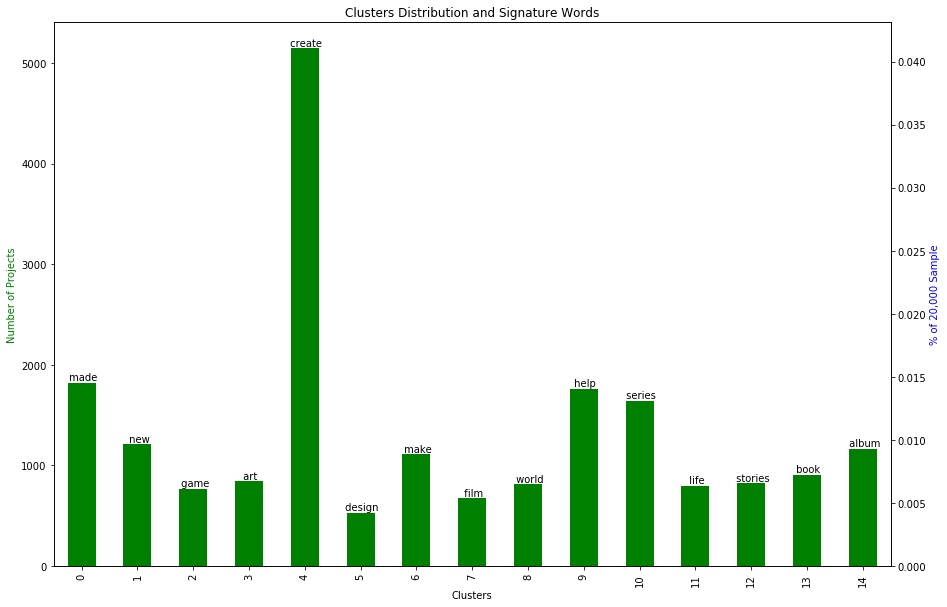

In [152]:
### Create a bar chart of projects distribution by cluster, both # and %
### Add signature word to each cluster's bar

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(15, 10))
### Add secondary y axis
ax2 = ax1.twinx()

plt.title('Clusters Distribution and Signature Words')

ax1.set_xlabel('Clusters')
ax1.set_ylabel('Number of Projects', color='g')
ax2.set_ylabel('% of 20,000 Sample', color='b')

### Plot counts of projects per cluster on primary y axis; order clusters by index
labels[0].value_counts().sort_index(ascending=True).plot(ax=ax1, kind='bar',color='g')

### Plot % of total of each cluster using secondary y axis
labels_dist.sort_index(ascending=True).plot(ax=ax2, kind='bar',color='g')

### Now make labels for each bar
ax = labels[0].value_counts().sort_index(ascending=True).plot(ax=ax1, kind='bar',color='g')
rects = ax.patches

for rect, label in zip(rects, topword_1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig('Clusters_Distr.png', bbox_inches='tight')

In [149]:
cat_dist = kicks.category.value_counts()/kicks.category.count()
cat_dist

music           0.190570
film & video    0.164119
publishing      0.121435
art             0.103598
technology      0.100757
food            0.067666
games           0.064290
fashion         0.047863
design          0.035354
comics          0.027526
crafts          0.020285
photography     0.019877
theater         0.016397
journalism      0.013318
dance           0.006945
Name: category, dtype: float64

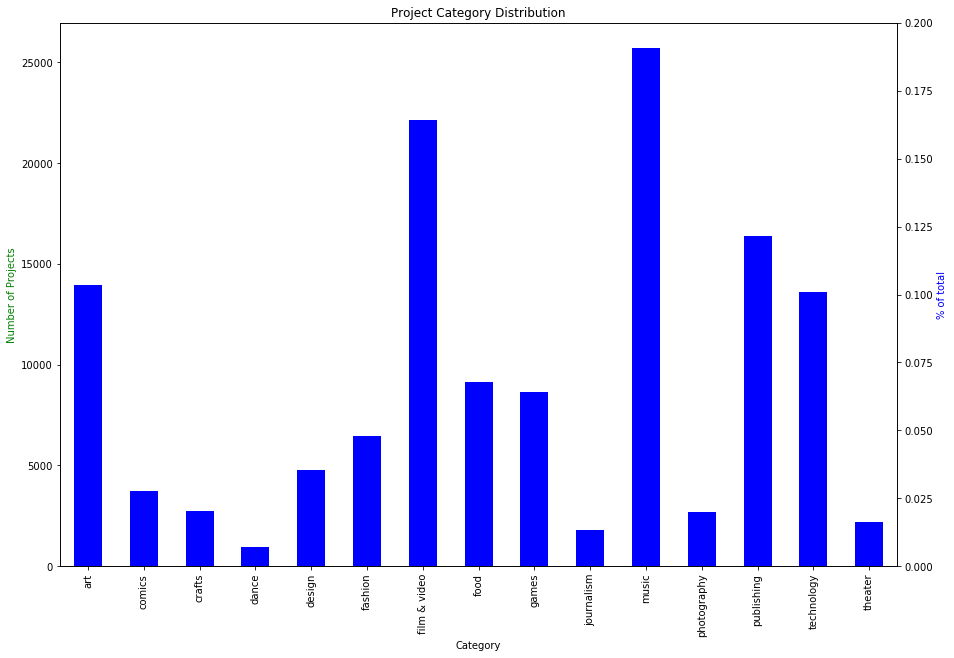

In [153]:
### Create bar chart of projects' distribution by category, # and %
### To describe the data 
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

plt.title('Project Category Distribution')

ax1.set_xlabel('Category')
ax1.set_ylabel('Number of Projects', color='g')
ax2.set_ylabel('% of total', color='b')
kicks.category.value_counts().sort_index(ascending=True).plot(ax=ax1, kind='bar',color='g')
cat_dist.sort_index(ascending=True).plot(ax=ax2, kind='bar',color='b')

plt.savefig('Cat_Distr.png', bbox_inches='tight')

In [174]:
### Create a chart of top 5 signature words for each cluster

import matplotlib.pyplot as plt; plt.rcdefaults()

plot_this = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i,v in enumerate(plot_this):
    words = TopicsList[i][1]
    y_pos = np.arange(len(words))
    weights = TopicsList[i][2]
    
    plt.barh(y_pos, weights, align='center')
    plt.yticks(y_pos, words)
    plt.xlabel('Weight')
    plt.title('Signature Words: Cluster %s' %v)
    plt.savefig('cl%s_words.png' %v, bbox_inches='tight')
    plt.close() 
